# Simple Linear Regression
- Pada tutorial kali ini, kita akan menggunakan dataset yang memiliki tiga fitur, yaitu pengeluaran untuk iklan di TV, Radio, dan Koran, serta variabel target penjualan (Sales).
- Tujuan dari tutorial ini adalah memprediksi penjualan berdasarkan pengeluaran iklan. Kita akan menggunakan Simple Linear Regression untuk memprediksi penjualan jika pengeluaran iklan adalah sebagai berikut:
    1. TV: 100, Radio: 20, Newspaper: 10
    2. TV: 150, Radio: 30, Newspaper: 15
    3. TV: 200, Radio: 40, Newspaper: 20
- Hipotesis awal: Pengeluaran iklan yang lebih tinggi pada TV, Radio, dan Koran akan menghasilkan penjualan yang lebih tinggi.


### Load library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Load datasets

In [2]:
#Nama dataframe kita adalah df yang berisi data dari data.csv
df = pd.read_csv('Advertising.csv', usecols=['TV', 'Radio', 'Newspaper'])

### Sneak peak data

In [3]:
#Melihat 5 baris teratas dari data
df.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [4]:
#Mengetahui jumlah kolom dan baris dari data
#Data kita mempunya 3 kolom dengan 200 baris
df.shape

(200, 3)

In [5]:
#Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [6]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll
df.describe()

,TV,Radio,Newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


### Handling Missing Values

In [7]:
#Mencari dan menangani missing values
#Ternyata data kita tidak ada missing values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
dtype: int64

### Exploratory Data Analysis (EDA)

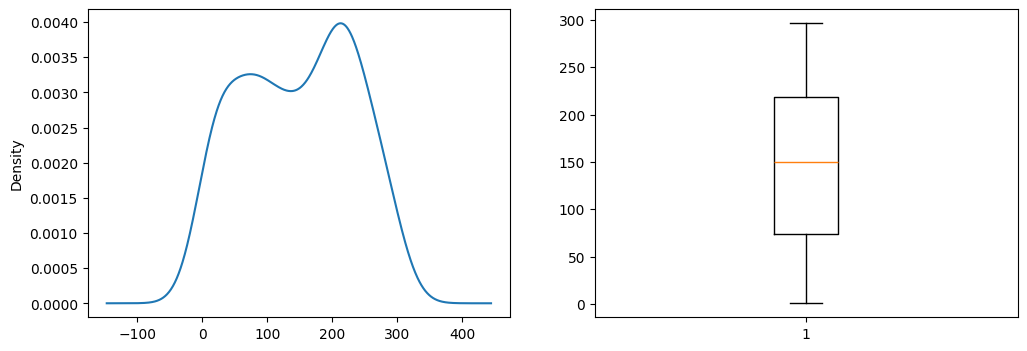

In [8]:
#Univariate analysis TV
#Melihat distribusi dari TV
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['TV'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['TV'])
plt.show()

- Dapat dilihat bahwa density dari horsepower paling tinggi di nilai 100.
- Distribusinya hampir mirip dengan distribusi normal namun persebaran data kurang merata (memiliki standard deviasi yang tinggi).

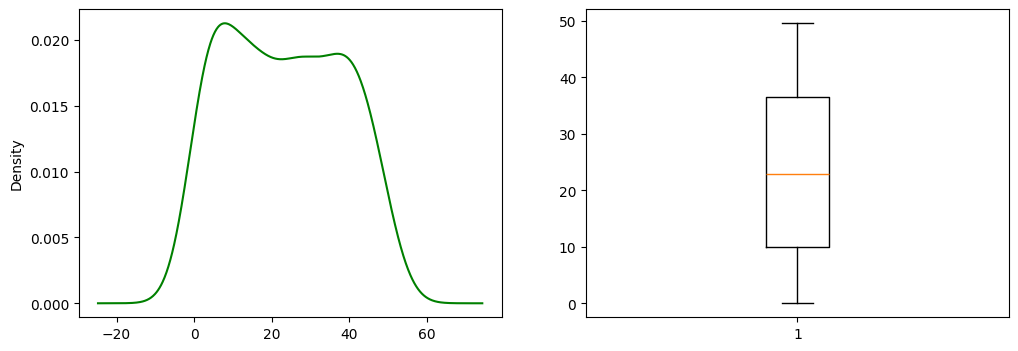

In [9]:
#Univariate analysis Radio
#Melihat distribusi dari Radio
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Radio'].plot(kind='kde', c='g')

f.add_subplot(1,2,2)
plt.boxplot(df['Radio'])
plt.show()

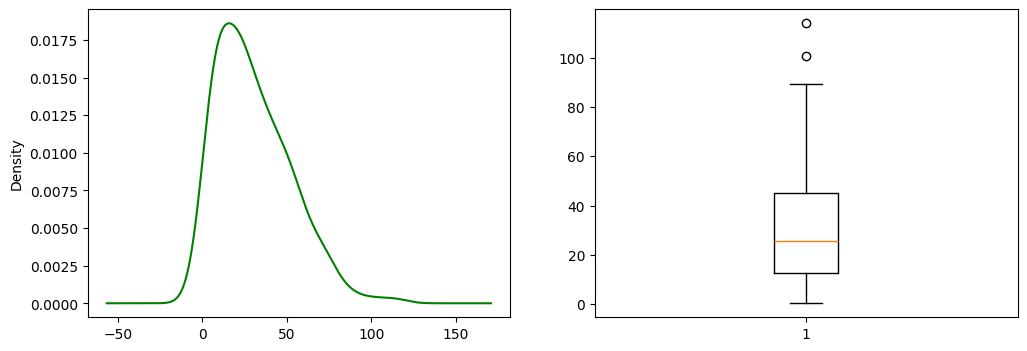

In [10]:
#Univariate analysis Newspaper
#Melihat distribusi dari Newspaper
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Newspaper'].plot(kind='kde', c='g')

f.add_subplot(1,2,2)
plt.boxplot(df['Newspaper'])
plt.show()

- Density dari price paling tinggi di nilai 10000.
- Distribusinya hampir mirip dengan distribusi normal namun persebaran data kurang merata (memiliki standard deviasi yang tinggi).

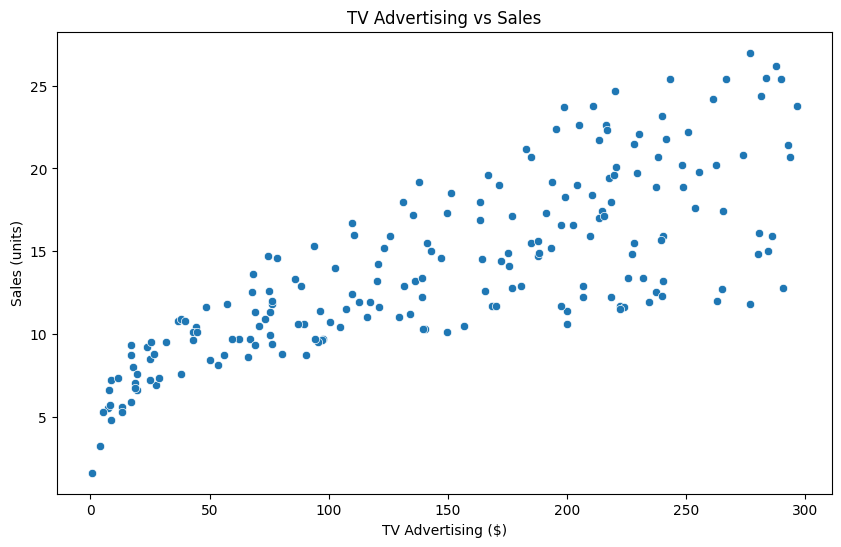

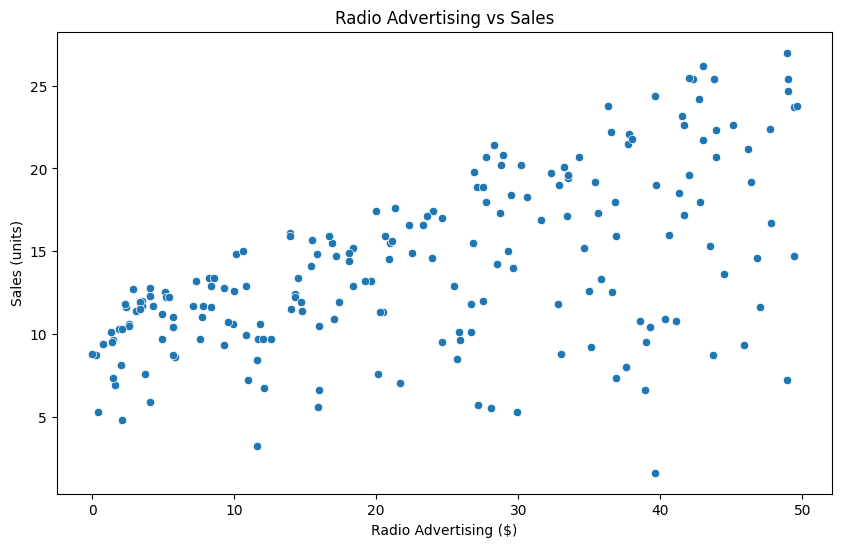

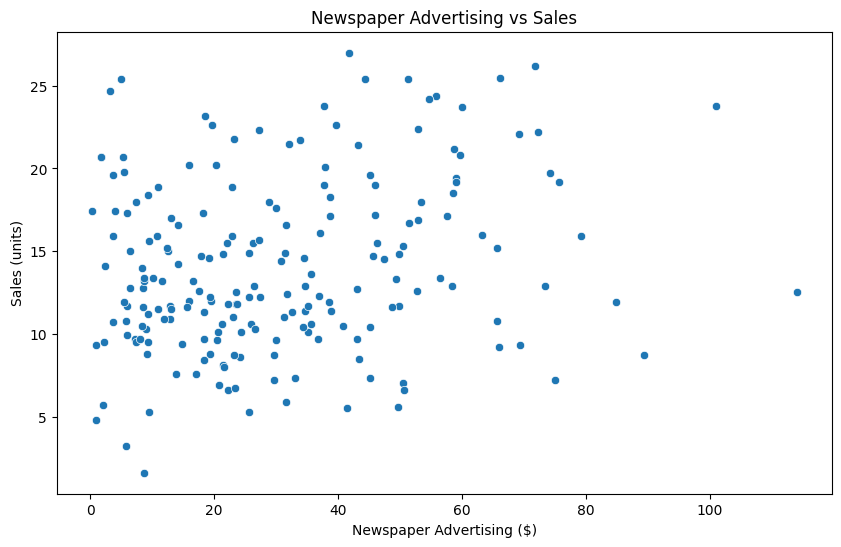

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('Advertising.csv')

# Scatter plot TV vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TV', y='Sales', data=data)
plt.title('TV Advertising vs Sales')
plt.xlabel('TV Advertising ($)')
plt.ylabel('Sales (units)')
plt.show()

# Scatter plot Radio vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Radio', y='Sales', data=data)
plt.title('Radio Advertising vs Sales')
plt.xlabel('Radio Advertising ($)')
plt.ylabel('Sales (units)')
plt.show()

# Scatter plot Newspaper vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Newspaper', y='Sales', data=data)
plt.title('Newspaper Advertising vs Sales')
plt.xlabel('Newspaper Advertising ($)')
plt.ylabel('Sales (units)')
plt.show()


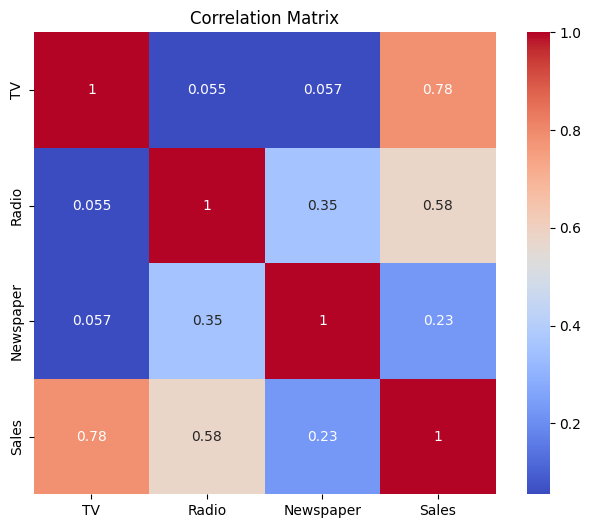

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


In [12]:
# Hitung matriks korelasi
correlation_matrix = data[['TV', 'Radio', 'Newspaper', 'Sales']].corr()

# Tampilkan matriks korelasi sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)


In [13]:
#Mengetahui nilai korelasi
#Nilai korelasinya adalah 0.81 termasuk kategori sangat tinggi
df.corr()

,TV,Radio,Newspaper
TV,1.000000,0.054809,0.056648
Radio,0.054809,1.000000,0.354104
Newspaper,0.056648,0.354104,1.000000


- Setelah kita tahu tentang karakteristik data kita, bisa dilanjutkan ke tahap modelling

### Modelling

In [14]:
#Recall data kita
df.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [15]:
#Pertama, buat variabel x dan y
x = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [16]:
#Kedua, kita split data kita menjadi training and testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
#Ketiga, kita bikin object linear regresi
lin_reg = LinearRegression()

In [18]:
#Keempat, train the model menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)

LinearRegression()

In [19]:
#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 0.04613627  0.19191776 -0.00243811]
2.8531673039949528


- dari nilai m dan b diatas, kalau dimasukan ke dalam rumus menjadi:
Y = 164.73x - 3903.39

In [20]:
#Keenam, kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit
lin_reg.score(x_test, y_test)

0.910520614600003

- Model kita mendapatkan accuracy score sebesar 78.68%

In [21]:
# Predict on the test set
y_pred = lin_reg.predict(x_test)

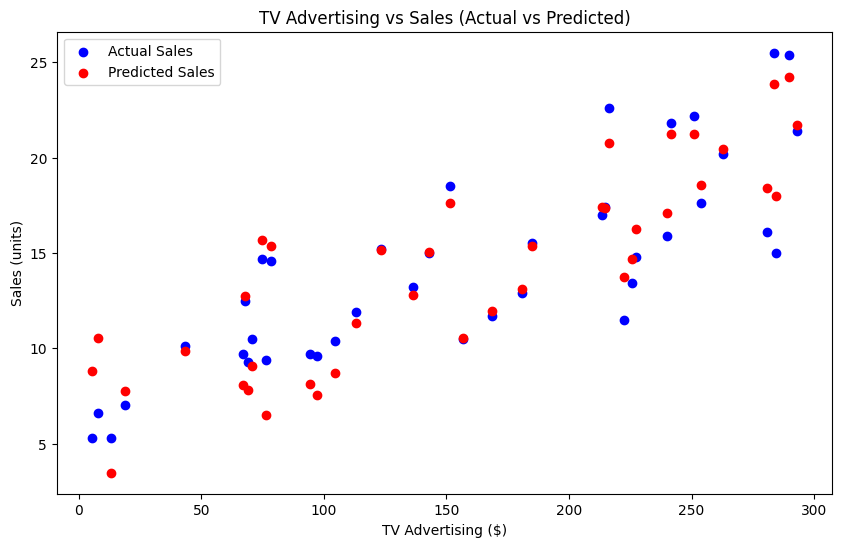

In [22]:
#Ketujuh, visualisasi aktual vs prediksi menggunakan data testing
#Garis merah merupakan garis regresi dari persamaan yang kita dapat tadi
plt.figure(figsize=(10, 6))
plt.scatter(x_test['TV'], y_test, label='Actual Sales', color='blue')
plt.scatter(x_test['TV'], y_pred, label='Predicted Sales', color='red')
plt.xlabel('TV Advertising ($)')
plt.ylabel('Sales (units)')
plt.title('TV Advertising vs Sales (Actual vs Predicted)')
plt.legend()
plt.show()

### Prediction
- Yuk kita prediksi harga mobil ketika memiliki horsepower 100, 150, dan 200

In [23]:
# Studi Kasus: Prediksi dengan input baru
input_baru = pd.DataFrame({
    'TV': [100, 150, 200],
    'Radio': [20, 30, 40],
    'Newspaper': [10, 15, 20]
})

# Prediksi penjualan berdasarkan input baru
prediksi_baru = lin_reg.predict(input_baru)
for i, pred in enumerate(prediksi_baru):
    print(f"Prediksi penjualan untuk input baru {input_baru.iloc[i].to_dict()}: {pred:.2f} unit")

Prediksi penjualan untuk input baru {'TV': 100, 'Radio': 20, 'Newspaper': 10}: 11.28 unit
Prediksi penjualan untuk input baru {'TV': 150, 'Radio': 30, 'Newspaper': 15}: 15.49 unit
Prediksi penjualan untuk input baru {'TV': 200, 'Radio': 40, 'Newspaper': 20}: 19.71 unit
